In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

In [2]:
fd=pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\innomatics class pdfs\car_df_EDA.csv")

In [3]:
fd

,Unnamed: 0.1,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,13495
1,1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,16500
2,2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152.0,mpfi,9.0,154,5000,19,26,16500
3,3,4,audi,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109.0,mpfi,10.0,102,5500,24,30,13950
4,4,5,audi,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136.0,mpfi,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,204,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,ohc,six,145.0,idi,23.0,106,4800,26,27,NaN
204,204,205,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,ohc,four,141.0,mpfi,9.5,114,5400,19,25,22625
205,202,203,volvo,gas,std,four,sedan,rwd,front,109.1,...,ohcv,six,173.0,mpfi,8.8,134,5500,18,23,21485
206,203,204,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,ohc,six,145.0,idi,23.0,106,4800,26,27,NaN


## Duplicate values

In [4]:
fd.duplicated().sum()

3

In [5]:
fd.drop_duplicates(keep='first',inplace=True)

In [6]:
fd.duplicated().sum()

0

### structural errors

In [7]:
fd['make'].dtype

dtype('O')

In [8]:
fd['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
fd['fuel_type'].unique()

array(['gas', 'diesel'], dtype=object)

In [10]:
fd['num_of_doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [11]:
fd['num_of_doors'].dtype

dtype('O')

In [12]:
fd['num_of_doors'].replace('?','nan')    

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num_of_doors, Length: 205, dtype: object

In [13]:
fd['body_style'].dtype

dtype('O')

In [14]:
fd['body_style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [15]:
fd['drive_wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [16]:
fd['drive_wheels'].dtype

dtype('O')

In [17]:
fd['engine_location'].dtype

dtype('O')

In [18]:
fd['engine_location'].unique()

array(['front', 'rear'], dtype=object)

In [19]:
fd['wheel_base'].dtype

dtype('float64')

In [20]:
fd['wheel_base'].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2,   nan, 103.5,
       110. ,  88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. ,
       113. , 102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6,
       120.9, 112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,
        99.2, 107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,
        97. ,  96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [21]:
fd['engine_type'].dtype

dtype('O')

In [22]:
fd['engine_type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', nan, 'ohcf', 'dohcv'],
      dtype=object)

In [23]:
fd['num_of_cylinders'].dtype

dtype('O')

In [24]:
fd['num_of_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [25]:
def cyl(n):
    if n=="two":
        return 2
    elif n=="four":
        return 4
    elif n=="six":
        return 6
    elif n=="eight":
        return 8
    elif n=="twelve":
        return 12
    else:
        return 3

In [26]:
fd['num_of_cylinders'].apply(cyl)

0      4
1      4
2      6
3      4
4      3
      ..
200    4
201    4
202    6
203    6
204    4
Name: num_of_cylinders, Length: 205, dtype: int64

In [27]:
fd['engine_size'].dtype

dtype('float64')

In [28]:
fd['engine_size'].unique()

array([130., 152., 109., 136., 131., 108., 164., 209.,  61.,  90.,  98.,
       122., 156.,  92.,  79., 110.,  nan, 111., 119., 258., 326.,  91.,
        70.,  80., 140., 134., 183., 234., 308., 304.,  97., 103., 120.,
       181., 151., 194., 203., 132., 121., 146., 171., 161., 141., 173.,
       145.])

In [29]:
fd['fuel_system'].dtype

dtype('O')

In [30]:
fd['fuel_system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [31]:
fd['compression_ratio'].dtype

dtype('float64')

In [32]:
fd['compression_ratio'].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [33]:
fd['horsepower'].dtype

dtype('O')

In [34]:
fd['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [35]:
fd['horsepower']=fd['horsepower'].replace('?',np.nan)

In [36]:
fd['peak_rpm'].dtype

dtype('O')

In [37]:
fd['peak_rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [38]:
fd['peak_rpm']=fd['peak_rpm'].replace('?',np.nan)

In [39]:
fd['city_mpg'].dtype

dtype('int64')

In [40]:
fd['city_mpg'].unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

In [41]:
fd['highway_mpg'].dtype

dtype('int64')

In [42]:
fd['highway_mpg'].unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

In [43]:
fd['price'].dtype

dtype('O')

In [44]:
fd['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', nan, '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16695', '170

In [45]:
fd['price']=fd['price'].replace('?',np.nan)

In [46]:
fd['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16695', '17075',


## Missing values

In [47]:
fd.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           2
length               0
width                0
height               0
curb_weight          0
engine_type          1
num_of_cylinders     0
engine_size          2
fuel_system          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                7
dtype: int64

In [49]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       205 non-null    int64  
 1   Unnamed: 0         205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        203 non-null

In [48]:
fd['wheel_base'].fillna(fd['wheel_base'].median(),inplace=True)

In [51]:
fd['engine_type'].fillna(fd['engine_type'].mode()[0],inplace=True)

In [52]:
fd['engine_size'].fillna(fd['engine_size'].mode()[0],inplace=True)

In [54]:
fd['horsepower'].fillna(fd['horsepower'].median(),inplace=True)

In [55]:
fd['peak_rpm'].fillna(fd['peak_rpm'].median(),inplace=True)

In [56]:
fd['price'].fillna(fd['price'].median(),inplace=True)

In [57]:
fd['peak_rpm']=fd['peak_rpm'].astype('int64')

In [58]:
fd['horsepower']=fd['horsepower'].astype('int64')

In [61]:
fd['price']=fd['price'].astype('int32')

## Univariate analysis

### Histogram

<Axes: xlabel='price', ylabel='Frequency'>

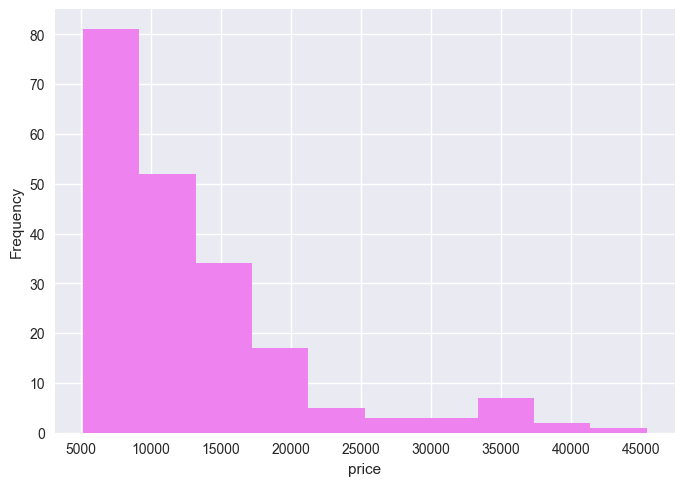

In [69]:
plt.style.use('seaborn-v0_8')
fd['price'].plot(kind='hist',xlabel='price',color='violet')

1.The lowest price of car is 5000 and highest price is 45000
2.80 cars are range between 5000 to 10000


## Boxplot

<Axes: >

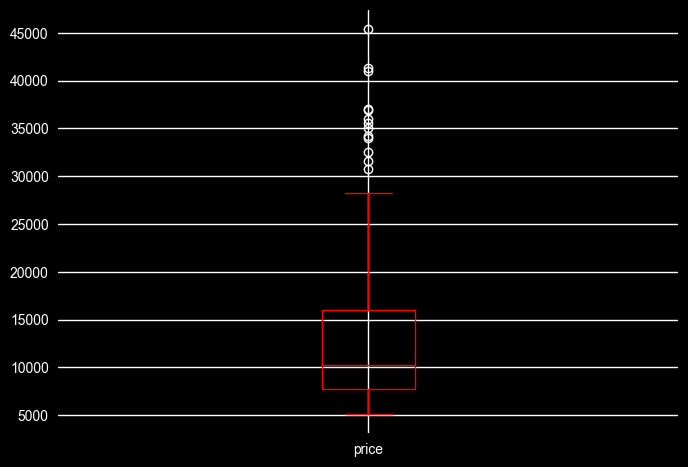

In [73]:
plt.style.use('dark_background')
fd['price'].plot(kind='box',color='red')

1.plot shows the outliers 
2.data is not uniformly distributed
3.The min value will arose between 5200-5300
4.The max value of price between 2700-2800

## Density

<Axes: ylabel='Density'>

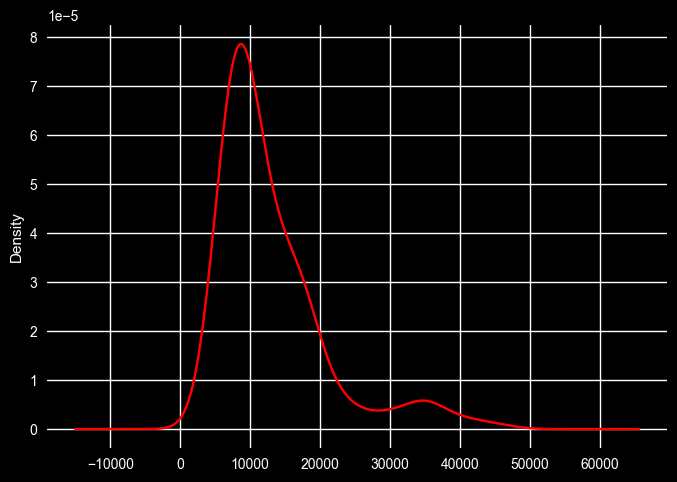

In [74]:
plt.style.use('dark_background')
fd['price'].plot(kind='density',color='red')

## Bar 

<Axes: xlabel='make'>

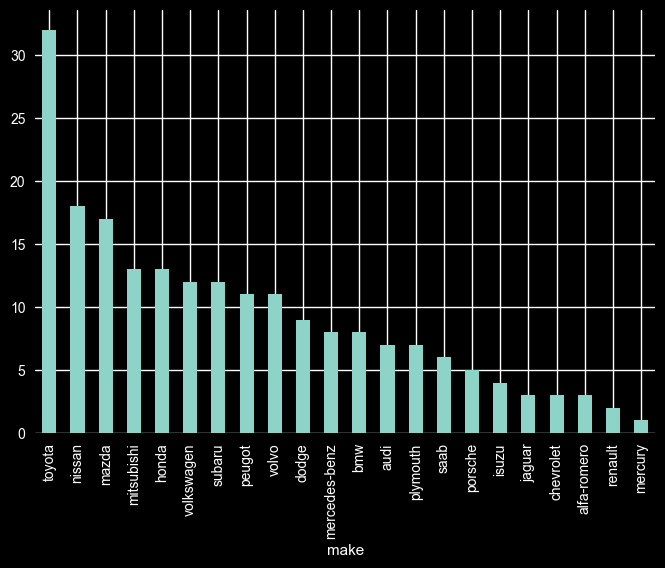

In [76]:
fd['make'].value_counts().plot(kind='bar')

1.The plot shows the availability of cars in the data set
2.Toyota is the higher in the number and mercury is in lower number

<Axes: xlabel='fuel_type'>

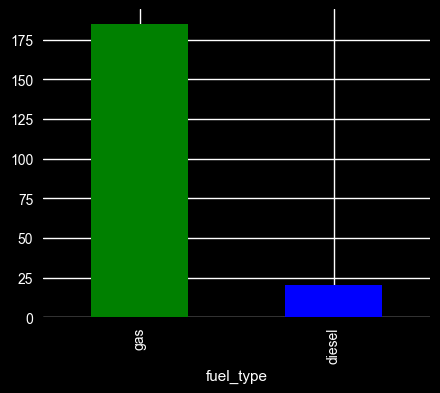

In [79]:
fd['fuel_type'].value_counts().plot(kind='bar',
                                   color=['green','blue'],
                                   figsize=(5,4),
                                    position=0.5
                                   )

this data shows the cars availabale related to type of fuels

<Axes: ylabel='fuel_type'>

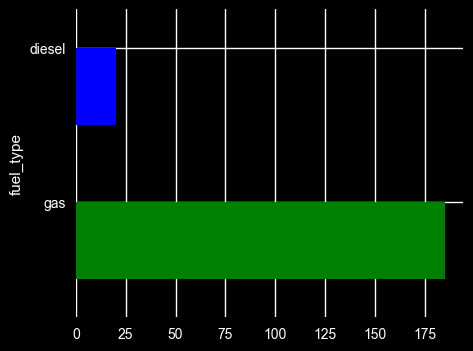

In [82]:
fd['fuel_type'].value_counts().plot(kind='barh',
                                   color=['green','blue'],
                                   figsize=(5,4),
                                    position=1
                                   )

<Axes: xlabel='engine_location'>

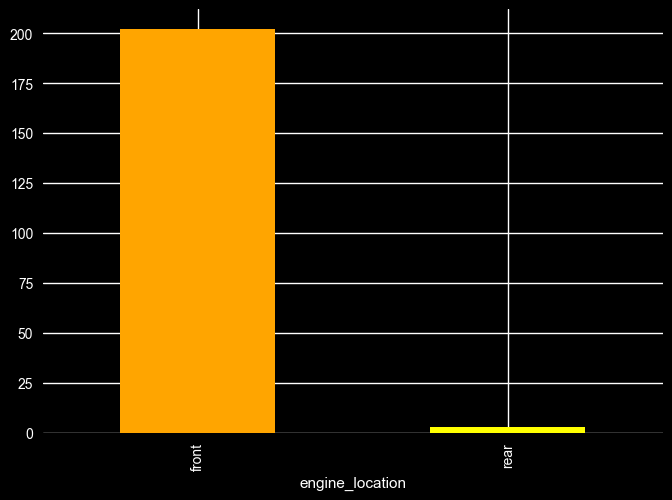

In [89]:
fd['engine_location'].value_counts().plot(kind='bar',color=['orange','yellow'])

1.Data says engine palced in front location are more available cars 

## pie chart

<Axes: ylabel='percent'>

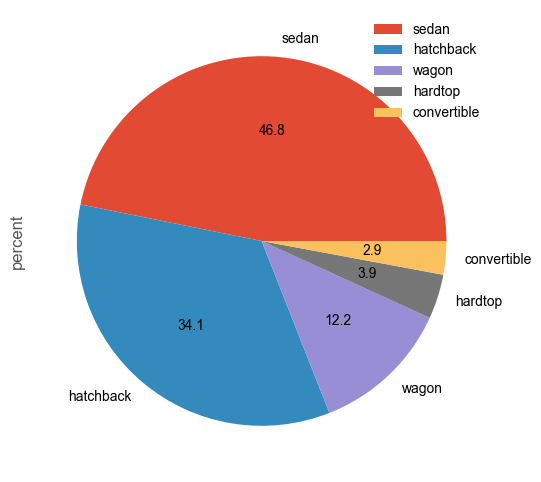

In [95]:
plt.style.use('ggplot')
(fd['body_style'].value_counts()/len(fd['body_style'])*100).plot(kind='pie',ylabel='percent',figsize=(10,6),autopct='%1.1f',legend=True)

<Axes: ylabel='percentage'>

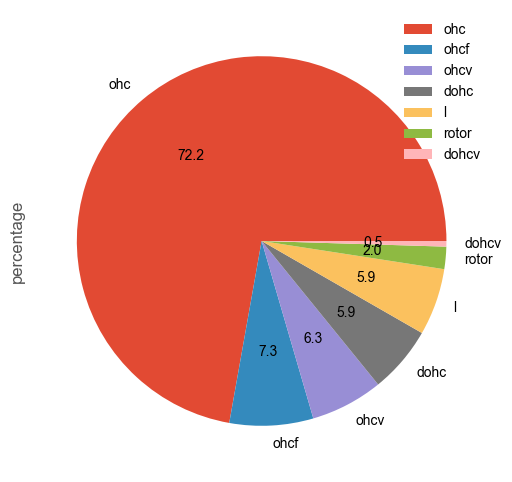

In [99]:
(fd['engine_type'].value_counts()/len(fd['engine_type'])*100).plot(kind='pie',ylabel='percentage',figsize=(8,6),autopct='%1.1f',legend=True)